Disaster Tweets

# Bag of Words Text Analysis

Inspect Data

In [208]:
import pandas as pd
import numpy as np

In [209]:
df = pd.read_csv("yelp_reviews.csv")

In [210]:
print("type of yelp_reviews: {}".format(type(df)))
print("length of yelp_reviews: {}".format(len(df)))

type of yelp_reviews: <class 'pandas.core.frame.DataFrame'>
length of yelp_reviews: 1000


In [211]:
df.head()

,class,text
0,positive,Wow... Loved this place.
1,negative,Crust is not good.
2,negative,Not tasty and the texture was just nasty.
3,positive,Stopped by during the late May bank holiday of...
4,positive,The selection on the menu was great and so wer...


In [212]:
# Balanced dataset in terms of postive and negative reviews
df["class"].value_counts()

negative    500
positive    500
Name: class, dtype: int64

In [213]:
# Create variables as numpy arrays / covert positive and negative to 1s and 0s
X = df.text.values
y = df['class'].replace({'negative': 0, 'positive': 1}).values

In [214]:
# Inspect
print(X[:5])
print(y[:5])

['Wow... Loved this place.' 'Crust is not good.'
 'Not tasty and the texture was just nasty.'
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'
 'The selection on the menu was great and so were the prices.']
[1 0 0 1 1]


In [215]:
# Split raw data into train and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train)

800

# CountVectorize: convert to "Bag of Words"

In [216]:
# Import and instantiate the Countvectorizer and fit to Yelp data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
# Learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(X_train)

CountVectorizer()

In [217]:
print("Vocabulary size: {}".format(len(vectorizer.vocabulary_)))
print()
print("Vocabulary details: {}".format(vectorizer.vocabulary_))

Vocabulary size: 1792

Vocabulary details: {'the': 1567, 'worst': 1769, 'was': 1707, 'salmon': 1334, 'sashimi': 1343, 'an': 51, 'excellent': 534, 'new': 1047, 'restaurant': 1292, 'by': 226, 'experienced': 542, 'frenchman': 623, 'went': 1729, 'for': 611, 'lunch': 937, 'service': 1385, 'slow': 1427, 'think': 1580, 'this': 1584, 'suffers': 1521, 'from': 631, 'not': 1059, 'trying': 1631, 'hard': 722, 'enough': 512, 'just': 853, 'had': 706, 'here': 748, 'and': 52, 'great': 680, 'experience': 541, 'got': 671, 'home': 764, 'to': 1597, 'see': 1368, 'driest': 467, 'damn': 377, 'wings': 1751, 'ever': 526, 'delicious': 398, 'they': 1575, 'brought': 206, 'fresh': 624, 'batch': 126, 'of': 1069, 'fries': 630, 'thinking': 1581, 'yay': 1779, 'something': 1445, 'warm': 1704, 'but': 224, 'no': 1053, 'then': 1572, 'tragedy': 1618, 'struck': 1506, 'awful': 106, 'food': 608, 'huge': 786, 'portions': 1196, 'give': 655, 'military': 993, 'discount': 432, 'waiter': 1694, 'wasn': 1708, 'helpful': 746, 'or': 109

In [218]:
# To create the "bag-of_words" representation we call the transform method or transform documents to document-term matrix.
X_train_vect = vectorizer.transform(X_train)
print("X_train_vect: {}".format(repr(X_train_vect)))

X_train_vect: <800x1792 sparse matrix of type '<class 'numpy.int64'>'
	with 7843 stored elements in Compressed Sparse Row format>


In [219]:
print("Dense representation of bag_of_words:: \n{}".format(X_train_vect.toarray()))

Dense representation of bag_of_words:: 
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Examine Bag of Words

In [220]:
feature_names = vectorizer.get_feature_names()

print("Number of features: {}".format(len(feature_names)))
print()
print("First 20 features: \n{}".format(feature_names[:40]))
print()
print("A lot numbers have been converted to tokens - do they have any meaning?")
print("Spelling mistakes")

Number of features: 1792

First 20 features: 
['10', '100', '12', '17', '1979', '20', '2007', '30', '30s', '35', '40', '40min', '45', '4ths', '5lb', '70', '85', '90', 'about', 'above', 'absolute', 'absolutely', 'absolutley', 'accident', 'accomodate', 'accountant', 'acknowledged', 'actual', 'actually', 'added', 'affordable', 'after', 'afternoon', 'again', 'ago', 'ahead', 'airline', 'ala', 'all', 'allergy']

A lot numbers have been converted to tokens - do they have any meaning?
Spelling mistakes


In [221]:
print("Features 500 to 550: \n{}".format(feature_names[500:550]))
print()
print("Singular and plurals - e.g. employee and employees")
print("Similar words with little difference in meaning - 'experience', 'experienced', 'experiencing' ")

Features 500 to 550: 
['else', 'elsewhere', 'email', 'employee', 'employees', 'empty', 'end', 'ended', 'english', 'enjoy', 'enjoyable', 'enjoyed', 'enough', 'ensued', 'entire', 'entrees', 'equally', 'especially', 'establishment', 'etc', 'ethic', 'eve', 'even', 'evening', 'event', 'events', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'exactly', 'excalibur', 'exceeding', 'excellent', 'exceptional', 'excuse', 'expanded', 'expect', 'expectations', 'expected', 'experience', 'experienced', 'experiencing', 'expert', 'exquisite', 'extensive', 'extra', 'extremely', 'eyed']

Singular and plurals - e.g. employee and employees
Similar words with little difference in meaning - 'experience', 'experienced', 'experiencing' 


In [222]:
print("Every 25th feature: \n{}".format(feature_names[::25]))
print()
print("'hasn', ")

Every 25th feature: 
['10', 'accountant', 'ample', 'are', 'average', 'basically', 'bellies', 'bloody', 'breaks', 'butter', 'case', 'chewy', 'cocktails', 'considering', 'covers', 'cut', 'delightful', 'disappoint', 'donut', 'duck', 'else', 'events', 'eyes', 'fella', 'flavors', 'fridays', 'generous', 'grain', 'guests', 'hasn', 'hi', 'horrible', 'imagination', 'instead', 'judging', 'later', 'liking', 'love', 'mall', 'mediocre', 'missed', 'multiple', 'nicest', 'oil', 'otto', 'pan', 'pecan', 'pizza', 'potato', 'pros', 'raspberry', 'refrained', 'revisiting', 'rushed', 'saving', 'send', 'shoe', 'slaw', 'sooooo', 'standard', 'strawberry', 'summary', 'tasty', 'they', 'today', 'trimmed', 'unless', 'ventilation', 'walls', 'weekly', 'wines', 'wrap']

'hasn', 


Perform baseline before we try to improve

In [223]:
# Build a classifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [224]:
model = LogisticRegression()
model

LogisticRegression()

In [225]:
scores = cross_val_score(model, X_train_vect, y_train, cv=5)

In [226]:
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.811


Reasonable performance for a balanced binary classification task. Try tuning regularization paramenter C to improve result.

In [253]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C":[0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(X_train_vect, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.814
Best parameters:  {'C': 10}


Assess the generalization performance on the test set using a C=10

In [254]:
X_test_vect = vectorizer.transform(X_test)
print("{:.3f}".format(grid.score(X_test_vect, y_test)))

0.810


Improve extraction of words

CountVectorizer extracts tokens using a regular expression "\b\w\w+\b" which finds all sequences of characters that consist of at least 2 letters or numbers (\w) and are separated by word boundaries. It splits contractions like doesn't into doesn and t. It converts all words to lowercase.

In [299]:
# Remove some of the useless tokens by setting a minimum number of documents a token needs to appear in with min_df
vectorizer = CountVectorizer(min_df=2).fit(X_train)
X_train_vect = vectorizer.transform(X_train)
print("X_train_vect with mind_df: {}".format(repr(X_train_vect)))

X_train_vect with mind_df: <800x744 sparse matrix of type '<class 'numpy.int64'>'
	with 6795 stored elements in Compressed Sparse Row format>


In [300]:
feature_names = vectorizer.get_feature_names()
print("Number of features: {}".format(len(feature_names)))
print()
print("First 20 features: \n{}".format(feature_names[:40]))
print()
print("Features 100 to 150: \n{}".format(feature_names[100:150]))
print()
print("Every 25th feature: \n{}".format(feature_names[::25]))

Number of features: 744

First 20 features: 
['10', '20', '30', '35', '40', 'about', 'absolutely', 'added', 'after', 'again', 'ago', 'all', 'almost', 'also', 'although', 'always', 'am', 'amazing', 'ambiance', 'amount', 'an', 'and', 'another', 'any', 'anyone', 'anything', 'anytime', 'anyway', 'appetizers', 'are', 'area', 'around', 'arrived', 'as', 'ask', 'asked', 'assure', 'at', 'ate', 'atmosphere']

Features 100 to 150: 
['bunch', 'burger', 'burgers', 'business', 'busy', 'but', 'butter', 'by', 'cafe', 'came', 'can', 'cannot', 'cant', 'care', 'cashier', 'char', 'charcoal', 'cheap', 'check', 'checked', 'cheese', 'cheeseburger', 'chef', 'chewy', 'chicken', 'chinese', 'chips', 'choose', 'clean', 'close', 'coffee', 'cold', 'color', 'come', 'comfortable', 'coming', 'company', 'complain', 'completely', 'considering', 'convenient', 'cook', 'cooked', 'cool', 'could', 'couple', 'course', 'cow', 'crazy', 'cream']

Every 25th feature: 
['10', 'anything', 'back', 'better', 'bunch', 'chinese', 'crea

In [301]:
model2 = LogisticRegression()
model2

LogisticRegression()

In [302]:
grid = GridSearchCV(model2, param_grid, cv=5)

In [303]:
grid.fit(X_train_vect, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [304]:
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.814
Best parameters:  {'C': 10}


In [306]:
X_test_vect = vectorizer.transform(X_test)
print("{:.3f}".format(grid.score(X_test_vect, y_test)))

0.810


Reduced features from 1792 to 744 with no loss in model accuracy

# Stopwords

In [311]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword: \n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword: 
['been', 'most', 'from', 'thick', 'at', 'describe', 'has', 'myself', 'your', 'eleven', 'hence', 'whereafter', 'everything', 'will', 'whatever', 'mine', 'call', 'thin', 'without', 'while', 'out', 'fifteen', 'un', 'thence', 'whereby', 'twenty', 'otherwise', 'to', 'of', 'show', 'seemed', 'please']


In [317]:
vectorizer = CountVectorizer(min_df=2, stop_words = "english").fit(X_train)
X_train_vect = vectorizer.transform(X_train)
print("X_train_vect with stop words:\n{}".format(repr(X_train_vect)))

X_train_vect with stop words:
<800x576 sparse matrix of type '<class 'numpy.int64'>'
	with 2940 stored elements in Compressed Sparse Row format>


In [318]:
model3 = LogisticRegression()
grid = GridSearchCV(model3, param_grid, cv=5)
grid.fit(X_train_vect, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best cross-validation score: 0.795
Best parameters:  {'C': 1}


# Rescaling the Data with tf-idf

Term Frequency (TF) - Inverse Document Frequency (IDF) - i.e. give a high weight to any term that appears often in a particular document, but not in very many documents in the corpus. If a word appears many times in a document, but not in very many documents, it is likely to be descriptive of those documents.

In [339]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=1, norm=None), LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01,0.1, 1, 10]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))

Best cross-validation score: 0.823


In [344]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# transform the training dataset
X_train_vect = vectorizer.transform(X_train)
# find maximum value for each of the features over the dataset
max_value = X_train_vect.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# get feature names
feature_names = np.array(vectorizer.get_feature_names())
print("Number of features: {}".format(len(feature_names)))
print()
print("Features with lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:50]]))
print()
print("Features with highest tfidf:\n{}".format(feature_names[sorted_by_tfidf[-50:]]))

Number of features: 1792

Features with lowest tfidf:
['service' 'my' 'but' 'have' 'at' 'here' 'time' 'go' 'one' 'just' 'out'
 'don' 'delicious' 'would' 'friendly' 'ever' 'your' 'by' 'only' 'also'
 'nice' 'came' 'restaurant' 'again' 'vegas' 'amazing' 'us' 'when' 'won'
 'experience' 'going' 'disappointed' 'first' 'love' 'even' 'eat' 'because'
 'about' 'say' 'salad' 'me' 'too' 'much' 'fresh' 'or' 'which' 'think'
 'definitely' 'always' 'could']

Features with highest tfidf:
['well' 'stars' 'we' 'quality' 'than' 'night' 'to' 'great' 'slow' 'sauce'
 'probably' 'hot' 'selection' 'she' 'burger' 'flavor' 'meal' 'sandwich'
 'another' 'dining' 'dishes' 'once' 'you' 'area' 'long' 'overpriced'
 'talk' 'pasta' 'zero' 'party' 'worse' 'flat' 'salsa' 'greek' 'sucked'
 'crowd' 'yum' 'marrow' 'shower' 'tribute' 'customers' 'bye' 'crab' 'fly'
 'legs' 'subway' 'steak' 'wait' 'waited' 'said']


In [346]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'was' 'to' 'is' 'it' 'this' 'of' 'food' 'not' 'in' 'place'
 'for' 'good' 'we' 'service' 'my' 'had' 'great' 'that' 'with' 'so' 'were'
 'be' 'back' 'but' 'very' 'have' 'you' 'at' 'here' 'are' 'on' 'they'
 'like' 'all' 'time' 'our' 'really' 'will' 'go' 'there' 'as' 'an' 'best'
 'one' 'just' 'don' 'out' 'their' 'would' 'delicious' 'up' 'friendly'
 'your' 'ever' 'only' 'by' 'also' 'nice' 'no' 'restaurant' 'can' 'did'
 'came' 'if' 'again' 'vegas' 'what' 'when' 'amazing' 'us' 'from'
 'experience' 'going' 'pretty' 'never' 'won' 'even' 'first' 'been'
 'disappointed' 'eat' 'love' 'got' 'much' 'bad' 'about' 'some' 'because'
 'too' 'me' 'salad' 'get' 'say' 'fresh' 'which' 'staff' 've' 'he']


# Model Coefficients

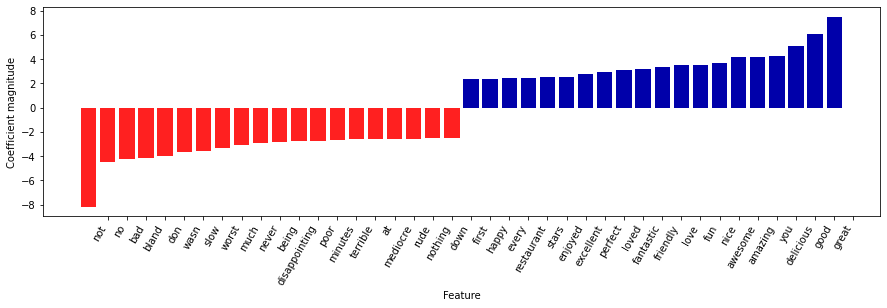

In [384]:
import mglearn
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps["logisticregression"]
    .coef_, feature_names, n_top_features=20)

# Bag of Words with more than one word (n-Grams)

In bag-of-words, word order is discarded.

In [382]:
pipe = make_pipeline(TfidfVectorizer(min_df=1), LogisticRegression())
# running the grid search takes a long time because of the large grid and inclusion of tri-grams
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100], "tfidfvectorizer__ngram_range": [(1,1), (1,2), (1,3)]}
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.3f}".format(grid.best_score_))
print("Best parameters: \n{}".format(grid.best_params_))

Best cross-validation score: 0.818
Best parameters: 
{'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 1)}


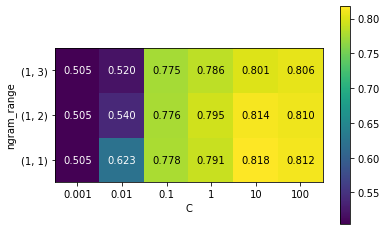

In [383]:
# extract scores from grid_search
import matplotlib.pyplot as plt
scores = grid.cv_results_["mean_test_score"].reshape(-1,3).T
# visualize heat map
heatmap = mglearn.tools.heatmap(
    scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f", 
    xticklabels=param_grid["logisticregression__C"],
    yticklabels=param_grid["tfidfvectorizer__ngram_range"])
plt.colorbar(heatmap)

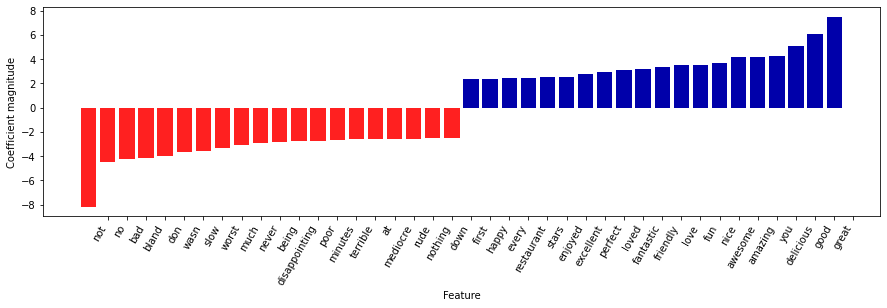

In [385]:
# extract feature names and coefficients
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=20)